# Distance concentration and Hubness

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from relational_embedder.data_prep import data_prep_utils as dpu
import numpy as np
from relational_embedder import api
from relational_embedder.api import Fabric
from relational_embedder.api import SIMF
import word2vec
import pickle
import itertools
path_to_row_we_model = '/data/raulcf/relemb/mitdwh/bench_mitdwh/we_db2vec_75_ns50_fns20_i40.bin'
row_we_model = word2vec.load(path_to_row_we_model)
path_to_row_relemb = '/data/raulcf/relemb/mitdwh/bench_mitdwh/relemb_db2vec_75_ns50_fn20/row.pkl'
with open(path_to_row_relemb, "rb") as f:
    row_relemb = pickle.load(f)
fabric = Fabric(row_we_model, None, row_relemb, None, None)

In [69]:
np.random.randint(4, size=10)

array([2, 3, 2, 3, 1, 1, 2, 1, 0, 1])

In [27]:
distances = []
vecs = [fabric.M_R.vectors[i] for i in np.random.randint(len(fabric.M_R.vectors), size=100)]
for v in vecs:
    dist = np.dot(fabric.M_R.vectors, v.T)
    distances.extend(dist)

In [28]:
distances = np.asarray(distances)

In [29]:
len(distances)

11987600

In [30]:
min(distances)

-0.6192046550333652

In [31]:
max(distances)

1.000000228192105

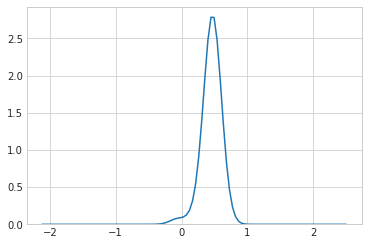

In [32]:
import seaborn as sns
sns.set_style('whitegrid')
p = sns.kdeplot(distances, bw=0.5)

### Rate of concentration

In [68]:
random_indexes = np.random.randint(0, len(distances), 1000)
cr = []
for ri in random_indexes:
    v = fabric.M_R.vectors[ri]
    distances = np.dot(fabric.M_R.vectors, v.T)
    std_distances = np.std(distances)
    mean_distances = np.mean(distances)
    concentration_ratio = std_distances / mean_distances
#     print("Concentration ratio: " + str(concentration_ratio))
    cr.append(concentration_ratio)
cr = sum(cr) / len(cr)
print("Avg concentration ratio: " + str(cr))

Avg concentration ratio: 0.2510806671327068


### Hubness on a sample

In [8]:
from collections import defaultdict
# random_indexes = np.random.randint(0, len(distances), 10000)
total_count = {k:0 for k in fabric.M_R.vocab}
# for ri in random_indexes:
for v in fabric.M_R.vectors: 
#     v = fabric.M_R.vectors[ri]
    res = fabric.topk_related_entities(v, k=10)
    for e, _ in res:
        total_count[e] += 1
total_count = sorted(total_count.items(), key=lambda x: x[1], reverse=True)
total_count

[('almheiri_saif', 156),
 ('http://eaps-www_mit_edu/people/morgan', 138),
 ('stanczak_sharon_jeanette', 135),
 ('mchugh_joanne_a', 133),
 ('ilene_r', 111),
 ('http://mit_edu/rachel/www/home_html', 110),
 ('korval', 108),
 ('weiss_anne_sarah', 105),
 ('http://dusp_mit_edu/faculty/frank-levy', 105),
 ('6173240144', 96),
 ('al_hosani_mohamed', 95),
 ('http://web_mit_edu/cre/', 93),
 ('nfinn@mit_edu', 92),
 ('filiault@mit_edu', 90),
 ('ehstege@mit_edu', 90),
 ('bheintz@mit_edu', 86),
 ('nessralla_richelle_a', 86),
 ('ejbruce@mit_edu', 84),
 ('yazdan_panah', 84),
 ('terrones_joaquin_sebastian', 83),
 ('cima', 82),
 ('wilcoxson_jaren_d', 81),
 ('roger_greenwood', 80),
 ('e40-222', 80),
 ('vega-tejeda', 78),
 ('http://mitfcu_org', 78),
 ('http://mit_edu/mark', 78),
 ('mhealy@mit_edu', 77),
 ('collier', 77),
 ('sachar', 76),
 ('w98-615f', 76),
 ('7819818295', 74),
 ('settens_charlie', 74),
 ('http://hst_mit_edu/', 74),
 ('http://web_mit_edu/physics/people/faculty/weinberg_nevin_html', 74),
 ('

In [13]:
word_hubness = defaultdict(int)
hubs = set()
antihubs = set()
hub_threshold = 10 * 2
for word, count in total_count:
    hubness = count / hub_threshold
    word_hubness[word] = hubness
    if count > hub_threshold:
        hubs.add(word)
for word in fabric.M_R.vocab:
    if word not in total_count:
        antihubs.add(word)
print("Total: " + str(len(fabric.M_R.vocab)))
print("#hubs: " + str(len(hubs)))
print("%hubs: " + str((len(hubs) / len(fabric.M_R.vocab)) * 100))

Total: 119876
#hubs: 8718
#antihubs: 119876
%hubs: 7.2725149320965
%antihubs: 100.0


In [16]:
antihubs = set()
whks = word_hubness.keys()
for word, count in total_count:
    if word not in whks:
        antihubs.add()
print("Total: " + str(len(fabric.M_R.vocab)))
print("#antihubs: " + str(len(antihubs)))
print("%antihubs: " + str((len(antihubs) / len(fabric.M_R.vocab)) * 100))     

Total: 119876
#antihubs: 0
%antihubs: 0.0


In [24]:
for word, hubness in word_hubness.items():
    if hubness >= 5:
        print(word)

almheiri_saif
http://eaps-www_mit_edu/people/morgan
stanczak_sharon_jeanette
mchugh_joanne_a
ilene_r
http://mit_edu/rachel/www/home_html
korval
weiss_anne_sarah
http://dusp_mit_edu/faculty/frank-levy


In [30]:
for word, hubness in word_hubness.items():
    if hubness < 0.000000000000000000000000000001:
        print(word)

non-exempt
ll_-_technical_staff
david_h_koch_institute_for_integrative_cancer_res
department_of_biological_engineering
michael
postdoctoral_fellow
david
john
department_of_chemical_engineering
picower_institute_for_learning_&_memory
division_of_comparative_medicine
dept_of_earth_atmospheric_&_planetary_sciences
laboratory_for_nuclear_science
james
institute_for_medical_engineering_and_science
ll_-_assistant_staff
mit_press
alumni_association
ll-aerospace
associate_professor
professor_emeritus
paul
stephen
music_and_theater_arts_section
microsystems_technology_laboratories
department_of_housing
10000429
senior_administrative_assistant
administrative_assistant_i
62000_0
human_resources_department
mit_police
10000593
10000491
facilities_custodial_services
10000565
mit_investment_management_company
10000320
civil_and_environmental_engineering
10000527
earth_atmospheric_&_planetary_sciences
electrical_engineering-computer_science
jonathan
lee
timothy
edward
10000542
10000612
402100_0
100042

## Building intuition for denoising

In [42]:
v = fabric.row_vector_for("32-g938")
res = fabric.topk_related_entities(v, k=10)
res

[('madden@csail_mit_edu', 0.97023240954564),
 ('srmadden', 0.9573691164066921),
 ('987515930', 0.9442821775896386),
 ('13975', 0.9387502287421707),
 ('madden_samuel_r', 0.8736097595243766),
 ('32-d610a', 0.8712829959239551),
 ('tommi@csail_mit_edu', 0.8588132244661102),
 ('32-g470', 0.8549681790949837),
 ('32-d624', 0.8496715818319918),
 ('26-453', 0.8357115969857967)]

### We check the all-pairs distances between the elements in the ranking

In [50]:
import itertools
distances = dict()
for a, b in itertools.combinations(res, 2):
    e_a = a[0]
    e_b = b[0]
    distance = np.dot(fabric.row_vector_for(e_a), fabric.row_vector_for(e_b))
    distances[(e_a, e_b)] = distance
distances = sorted(distances.items(), key=lambda x: x[1], reverse=True)
distances

[(('987515930', '13975'), 0.9949656999316984),
 (('srmadden', '987515930'), 0.9902247544063401),
 (('srmadden', '13975'), 0.9861794295876789),
 (('tommi@csail_mit_edu', '32-g470'), 0.9658306624770462),
 (('32-g470', '32-d624'), 0.9294316525722957),
 (('32-d610a', '32-g470'), 0.9211463113295147),
 (('987515930', 'madden_samuel_r'), 0.9128845427368911),
 (('13975', 'madden_samuel_r'), 0.9076621200518711),
 (('32-d610a', 'tommi@csail_mit_edu'), 0.9074517286826311),
 (('madden@csail_mit_edu', '32-g470'), 0.9057281956660176),
 (('madden@csail_mit_edu', 'srmadden'), 0.902271334389739),
 (('madden@csail_mit_edu', '987515930'), 0.8943788873167495),
 (('madden@csail_mit_edu', '32-d610a'), 0.8892598367403786),
 (('madden@csail_mit_edu', '13975'), 0.8880640162366932),
 (('madden@csail_mit_edu', '32-d624'), 0.8871928760310891),
 (('tommi@csail_mit_edu', '32-d624'), 0.8829776249284315),
 (('madden@csail_mit_edu', 'madden_samuel_r'), 0.8777760586477653),
 (('srmadden', 'madden_samuel_r'), 0.87706241

### We print, along with each entity in the ranking, its hubness and distance concentration rate

In [61]:
# printing hubness of each entity and conc rate
v = fabric.row_vector_for("32-g938")
res = fabric.topk_related_entities(v, k=10)
for e, s in res:
    hubness = word_hubness[e]
    v = fabric.M_R.get_vector(e)
    distances = np.dot(fabric.M_R.vectors, v.T)
    std_distances = np.std(distances)
    mean_distances = np.mean(distances)
    concentration_ratio = std_distances / mean_distances
    print(str(e) + " -> h: " + str(hubness) + ", cr: " + str(concentration_ratio))

madden@csail_mit_edu -> h: 0.55, cr: 0.24267435846016983
srmadden -> h: 0.3, cr: 0.25709597479756935
987515930 -> h: 0.25, cr: 0.25182181543458937
13975 -> h: 0.35, cr: 0.25900938059667905
madden_samuel_r -> h: 0.25, cr: 0.24972967458014714
32-d610a -> h: 0.55, cr: 0.22742240609889516
tommi@csail_mit_edu -> h: 0.45, cr: 0.24467179534010194
32-g470 -> h: 1.75, cr: 0.21285647454516157
32-d624 -> h: 1.45, cr: 0.22421197316414315
26-453 -> h: 1.0, cr: 0.22490272966461242


### In this case above, we see that entities with hubness > 1 are wrong

### We try with 'stonebraker_michael'

In [63]:
# printing hubness of each entity and conc rate
v = fabric.row_vector_for("stonebraker_michael")
res = fabric.topk_related_entities(v, k=10)
for e, s in res:
    hubness = word_hubness[e]
    v = fabric.M_R.get_vector(e)
    distances = np.dot(fabric.M_R.vectors, v.T)
    std_distances = np.std(distances)
    mean_distances = np.mean(distances)
    concentration_ratio = std_distances / mean_distances
    print(str(e) + " -> h: " + str(hubness) + ", cr: " + str(concentration_ratio))

900053155 -> h: 0.6, cr: 0.25402349183082135
14151 -> h: 0.4, cr: 0.26183942780011493
michael_hartmann -> h: 0.35, cr: 0.2839538271582187
ullman_shimon -> h: 0.45, cr: 0.2942760547102475
shrestha -> h: 0.95, cr: 0.3239140834375205
6172533538 -> h: 0.3, cr: 0.2294026539404704
stonebra -> h: 0.45, cr: 0.25300061098819004
braida -> h: 2.3, cr: 0.261784698357136
forney_g_david -> h: 0.6, cr: 0.3523930115238454
grodzins -> h: 1.0, cr: 0.2785619483850937


### Ranking is bad, but again, high hubness is related to really bad entities

### If I get one subranking from the top entity...

In [64]:
# printing hubness of each entity and conc rate
v = fabric.row_vector_for("900053155")
res = fabric.topk_related_entities(v, k=10)
for e, s in res:
    hubness = word_hubness[e]
    v = fabric.M_R.get_vector(e)
    distances = np.dot(fabric.M_R.vectors, v.T)
    std_distances = np.std(distances)
    mean_distances = np.mean(distances)
    concentration_ratio = std_distances / mean_distances
    print(str(e) + " -> h: " + str(hubness) + ", cr: " + str(concentration_ratio))

14151 -> h: 0.4, cr: 0.26183942780011493
stonebra -> h: 0.45, cr: 0.25300061098819004
6172533538 -> h: 0.3, cr: 0.2294026539404704
32-g922 -> h: 0.5, cr: 0.24288620177139048
stonebraker -> h: 0.25, cr: 0.2569204165710468
stonebraker_michael -> h: 0.15, cr: 0.30002140185528814
stonebraker@csail_mit_edu -> h: 0.25, cr: 0.28531220722335704
sullman -> h: 0.5, cr: 0.2538603619623187
14218 -> h: 0.6, cr: 0.2596789653245258
14s-322 -> h: 0.85, cr: 0.22233816509213575


### that gives much better results, without bad-entities, it may be possible to compute replacements

In [65]:
# printing hubness of each entity and conc rate
v = fabric.row_vector_for("sullman")
res = fabric.topk_related_entities(v, k=10)
for e, s in res:
    hubness = word_hubness[e]
    v = fabric.M_R.get_vector(e)
    distances = np.dot(fabric.M_R.vectors, v.T)
    std_distances = np.std(distances)
    mean_distances = np.mean(distances)
    concentration_ratio = std_distances / mean_distances
    print(str(e) + " -> h: " + str(hubness) + ", cr: " + str(concentration_ratio))

14218 -> h: 0.6, cr: 0.2596789653245258
900009706 -> h: 0.4, cr: 0.2700247080370845
6173245340 -> h: 0.85, cr: 0.21069286627043557
46-5149 -> h: 0.45, cr: 0.2572928638196987
ullman -> h: 0.8, cr: 0.25298635424855187
ullman_shimon -> h: 0.45, cr: 0.2942760547102475
6172535762 -> h: 0.75, cr: 0.2376917156537144
46-4079 -> h: 1.3, cr: 0.2287563536827241
stonebra -> h: 0.45, cr: 0.25300061098819004
900053155 -> h: 0.6, cr: 0.25402349183082135


In [66]:
word_hubness['987515930']

0.25

In [53]:
word_hubness['13975']

0.35

In [54]:
word_hubness['srmadden']

0.3

In [55]:
word_hubness['tommi@csail_mit_edu']

0.45

In [56]:
word_hubness['32-g470']

1.75

In [57]:
word_hubness['32-d624']

1.45

In [58]:
word_hubness['madden_samuel_r']

0.25

In [59]:
word_hubness['32-d610a']

0.55

In [60]:
word_hubness['madden@csail_mit_edu']

0.55

In [67]:
# store hubness data
with open("/data/raulcf/relemb/mitdwh/bench_mitdwh/relemb_db2vec_75_ns50_fn20/hubness.pkl", "wb") as f:
    pickle.dump(word_hubness, f)

## Finding good replacements

In [77]:
def all_pairs_ranking(entity, k=10):
    v = fabric.row_vector_for(entity)
    res = fabric.topk_related_entities(v, k=k)
    distances = dict()
    filtered_res = []
    for e, s in res:
        if word_hubness[e] < 0.85:
            filtered_res.append((e, s))
    for a, b in itertools.combinations(filtered_res, 2):
        e_a = a[0]
        e_b = b[0]
        distance = np.dot(fabric.row_vector_for(e_a), fabric.row_vector_for(e_b))
        distances[(e_a, e_b)] = distance
    distances = sorted(distances.items(), key=lambda x: x[1], reverse=True)
    return res, filtered_res, distances

In [78]:
res, filtered_res, d = all_pairs_ranking("stonebraker_michael")

In [79]:
d

[(('900053155', '14151'), 0.9970540390838916),
 (('14151', 'stonebra'), 0.9845024333454627),
 (('900053155', 'stonebra'), 0.9807308708154991),
 (('6172533538', 'stonebra'), 0.9318836032702593),
 (('900053155', '6172533538'), 0.9265597063170998),
 (('14151', '6172533538'), 0.9231029088183258),
 (('ullman_shimon', 'forney_g_david'), 0.8529177994277753),
 (('900053155', 'ullman_shimon'), 0.7663072061758847),
 (('14151', 'ullman_shimon'), 0.7399138065780386),
 (('michael_hartmann', 'forney_g_david'), 0.7395336443543407),
 (('ullman_shimon', '6172533538'), 0.7376693334541524),
 (('ullman_shimon', 'stonebra'), 0.7119712711264878),
 (('michael_hartmann', '6172533538'), 0.6853076753093287),
 (('michael_hartmann', 'ullman_shimon'), 0.679332489195227),
 (('900053155', 'michael_hartmann'), 0.6527182651893988),
 (('900053155', 'forney_g_david'), 0.6341517710119866),
 (('14151', 'michael_hartmann'), 0.63244725019299),
 (('michael_hartmann', 'stonebra'), 0.6122016753264714),
 (('6172533538', 'forney

In [81]:
scores = [s for e, s in d]
scores = np.asarray(scores)
p95 = np.percentile(scores, 95)
p95

0.9845024333454627

In [83]:
filtered_res

[('900053155', 0.8809724639744005),
 ('14151', 0.8613751994628803),
 ('michael_hartmann', 0.8421039284736591),
 ('ullman_shimon', 0.8370519283284907),
 ('6172533538', 0.8282799332016751),
 ('stonebra', 0.8176964257308436),
 ('forney_g_david', 0.8149427555232311)]

In [106]:
from sklearn.cluster import KMeans
def cluster_res(res, c=3):
    # obtain vectors
    X = []
    for el, d in filtered_res:
        v = fabric.M_R.get_vector(el)
        X.append(v)
    X = np.asarray(X)
    kmeans = KMeans(n_clusters=c)
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    clusters = defaultdict(list)
    for i, entry in enumerate(zip(filtered_res, labels)):
        ranking_entry, label = entry
        clusters[label].append(ranking_entry)
    return clusters

In [119]:
clusters = cluster_res(filtered_res, 3)

In [120]:
clusters

defaultdict(list,
            {0: [('900053155', 0.8809724639744005),
              ('14151', 0.8613751994628803),
              ('6172533538', 0.8282799332016751),
              ('stonebra', 0.8176964257308436)],
             1: [('ullman_shimon', 0.8370519283284907),
              ('forney_g_david', 0.8149427555232311)],
             2: [('michael_hartmann', 0.8421039284736591)]})

### if we were to choose cluster 0 (the seemingly correct one) what happens?

In [111]:
v = fabric.row_vector_for("900053155")
res = fabric.topk_related_entities(v, k=10)
res

[('14151', 0.9970540390838916),
 ('stonebra', 0.980730870815499),
 ('6172533538', 0.9265597063170999),
 ('32-g922', 0.9067064046966866),
 ('stonebraker', 0.9009649153052874),
 ('stonebraker_michael', 0.8809724639744005),
 ('stonebraker@csail_mit_edu', 0.8762304198329682),
 ('sullman', 0.8140497962409703),
 ('14218', 0.8116981360298783),
 ('14s-322', 0.8080277864032006)]

In [112]:
v = fabric.row_vector_for("14151")
res = fabric.topk_related_entities(v, k=10)
res

[('900053155', 0.9970540390838916),
 ('stonebra', 0.9845024333454626),
 ('6172533538', 0.9231029088183259),
 ('32-g922', 0.9021947030180499),
 ('stonebraker', 0.8884823020816552),
 ('stonebraker@csail_mit_edu', 0.8682788149671927),
 ('stonebraker_michael', 0.8613751994628803),
 ('sullman', 0.8084046788838064),
 ('mcarbin', 0.8046931548420351),
 ('14218', 0.8009239378630011)]

In [113]:
v = fabric.row_vector_for("6172533538")
res = fabric.topk_related_entities(v, k=10)
res

[('stonebra', 0.9318836032702593),
 ('900053155', 0.9265597063170999),
 ('14151', 0.9231029088183259),
 ('6172534605', 0.8958425243548573),
 ('6172521578', 0.8821745457558001),
 ('6172532575', 0.8807882981252907),
 ('henry_ellis_warren_professor_of_ee_&_hst', 0.8803942298210634),
 ('associate_professor_of_elec_eng_&_computer_science', 0.8702436969428138),
 ('mcafee_professor_of_electrical_engineering', 0.8695964729609189),
 ('http://hst_mit_edu/public/people/faculty/facultybiosketch_jsp?key=braida',
  0.8695495844757533)]

In [114]:
v = fabric.row_vector_for("stonebra")
res = fabric.topk_related_entities(v, k=10)
res

[('14151', 0.9845024333454626),
 ('900053155', 0.980730870815499),
 ('6172533538', 0.9318836032702593),
 ('32-g922', 0.915851689949088),
 ('stonebraker@csail_mit_edu', 0.8771595538385033),
 ('stonebraker', 0.8415715464000597),
 ('sullman', 0.8254158980345383),
 ('14s-322', 0.8236534983676465),
 ('mcarbin', 0.8217674199273064),
 ('10-172', 0.8203431988223988)]

### seems correct. what if we pick wrong cluster?

In [123]:
v = fabric.row_vector_for("ullman_shimon")
res = fabric.topk_related_entities(v, k=10)
res

[('900009706', 0.9428427888985327),
 ('14218', 0.9275599235292848),
 ('6173245340', 0.8861927793283019),
 ('shimon', 0.8810920050706306),
 ('ullman', 0.8751482104971366),
 ('corkin_suzanne_h', 0.8661315794506825),
 ('sullman', 0.8552973767241846),
 ('forney_g_david', 0.8529177994277752),
 ('hanono_wachman', 0.8440078559590465),
 ('stonebraker_michael', 0.8370519283284907)]

In [124]:
v = fabric.row_vector_for("forney_g_david")
res = fabric.topk_related_entities(v, k=10)
res

[('fano_robert_m', 0.9104304256550028),
 ('james_donald', 0.8950779255987715),
 ('robert_mario', 0.8749768380515023),
 ('shrestha', 0.870552801543039),
 ('paul_e', 0.8689792338593876),
 ('philip_r', 0.8577184641768963),
 ('braida', 0.8572536425287542),
 ('ullman_shimon', 0.8529177994277752),
 ('madry_aleksander', 0.8525730716219442),
 ('stephenson_tamina_christine', 0.8522028746574424)]

###  Let's do a voting session

In [125]:
cluster_votes = defaultdict(lambda: defaultdict(int))
for cid, entities in clusters.items():
    for entity, d in entities:
        v = fabric.row_vector_for(entity)
        res = fabric.topk_related_entities(v, k=10)
        for e, d in res:
            cluster_votes[cid][e] += 1

In [126]:
cluster_votes

defaultdict(<function __main__.<lambda>>,
            {0: defaultdict(int,
                         {'10-172': 1,
                          '14151': 3,
                          '14218': 2,
                          '14s-322': 2,
                          '32-g922': 3,
                          '6172521578': 1,
                          '6172532575': 1,
                          '6172533538': 3,
                          '6172534605': 1,
                          '900053155': 3,
                          'associate_professor_of_elec_eng_&_computer_science': 1,
                          'henry_ellis_warren_professor_of_ee_&_hst': 1,
                          'http://hst_mit_edu/public/people/faculty/facultybiosketch_jsp?key=braida': 1,
                          'mcafee_professor_of_electrical_engineering': 1,
                          'mcarbin': 2,
                          'stonebra': 3,
                          'stonebraker': 3,
                          'stonebraker@csail_mit_edu': 

In [137]:
for cid, mv in cluster_votes.items():
    total_entities = len(mv)
    total_count = sum(mv.values())
    density = float(float(total_count) / float(total_entities))
    print(str(cid) + " -> " + str(density))

0 -> 2.0
2 -> 1.0
1 -> 1.0


In [129]:
root_entities = {e for e,_ in filtered_res}

In [132]:
filtered_cluster_votes = []
for e, count in cluster_votes[0].items():
    if e not in root_entities:
        filtered_cluster_votes.append((e, count))
filtered_cluster_votes = sorted(filtered_cluster_votes, key=lambda x: x[1], reverse=True)
filtered_cluster_votes

[('32-g922', 3),
 ('stonebraker', 3),
 ('stonebraker@csail_mit_edu', 3),
 ('sullman', 3),
 ('stonebraker_michael', 2),
 ('14218', 2),
 ('14s-322', 2),
 ('mcarbin', 2),
 ('6172534605', 1),
 ('6172521578', 1),
 ('6172532575', 1),
 ('henry_ellis_warren_professor_of_ee_&_hst', 1),
 ('associate_professor_of_elec_eng_&_computer_science', 1),
 ('mcafee_professor_of_electrical_engineering', 1),
 ('http://hst_mit_edu/public/people/faculty/facultybiosketch_jsp?key=braida',
  1),
 ('10-172', 1)]

In [133]:
for e, count in filtered_cluster_votes:
    print(e + " h: " + str(word_hubness[e]))

32-g922 h: 0.5
stonebraker h: 0.25
stonebraker@csail_mit_edu h: 0.25
sullman h: 0.5
stonebraker_michael h: 0.15
14218 h: 0.6
14s-322 h: 0.85
mcarbin h: 0.55
6172534605 h: 0.95
6172521578 h: 1.3
6172532575 h: 2.35
henry_ellis_warren_professor_of_ee_&_hst h: 2.25
associate_professor_of_elec_eng_&_computer_science h: 0.8
mcafee_professor_of_electrical_engineering h: 1.05
http://hst_mit_edu/public/people/faculty/facultybiosketch_jsp?key=braida h: 1.35
10-172 h: 1.4


In [99]:
avg_distance = dict()
for cid, group in clusters.items():
    v = fabric.row_vector_for("stonebraker_michael")
    cluster_distance = []
    cluster_hubness = []
    for e, s in group:
        ev = fabric.row_vector_for(e)
        d = np.dot(v, ev)
        cluster_distance.append(d)
        cluster_hubness.append(word_hubness[e])
    cd = sum(cluster_distance) / len(cluster_distance)
    ch = sum(cluster_hubness) / len(cluster_hubness)
    avg_distance[cid] = (cd, hubness)

In [100]:
avg_distance

{0: (0.8470810055924499, 0.6),
 1: (0.8259973419258608, 0.6),
 2: (0.8421039284736591, 0.6)}

In [185]:
from sklearn.cluster import KMeans
def topk_related_entities_sden(query_entity, k=10, hth=0.85, c=4):
    v = fabric.row_vector_for(query_entity)
    res = fabric.topk_related_entities(v, k=k)
    # filter bad ones based on hubness
    filtered_res = []
    filtered_out_root_entities = []
    for e, s in res:
        if word_hubness[e] < hth:
            filtered_res.append((e, s))
        else:
            filtered_out_root_entities.append((e, word_hubness[e]))
    print(filtered_res)
    num_swaps = k - len(filtered_res)
    print(num_swaps)
    # obtain vectors
    X = []
    for el, d in filtered_res:
        v = fabric.M_R.get_vector(el)
        X.append(v)
    X = np.asarray(X)
    if len(X) > c:
        num_clusters = c  # as specified in input parameter
    else:
        num_clusters = len(X) - 1  # to avoid error and still get something out of this
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    clusters = defaultdict(list)
    for i, entry in enumerate(zip(filtered_res, labels)):
        ranking_entry, label = entry
        clusters[label].append(ranking_entry)
    # Voting session on clusters
    cluster_votes = defaultdict(lambda: defaultdict(int))
    for cid, entities in clusters.items():
        for entity, d in entities:
            v = fabric.row_vector_for(entity)
            res = fabric.topk_related_entities(v, k=k)
            for e, d in res:
                cluster_votes[cid][e] += 1
    # Big heuristic
    density_votes_cluster = dict()
    for cid, mv in cluster_votes.items():
        total_entities = len(mv)
        total_count = sum(mv.values())
        density = float(float(total_count) / float(total_entities))
        density_votes_cluster[cid] = density
    chosen_cid = None
    max_dens = -1
    for key, v in density_votes_cluster.items():
        if v > max_dens:
            max_dens = v
            chosen_cid = key
    # retrieve votes after filtering hub-bad entities and filtering out entities in root ranking
    root_entities = {e for e,_ in filtered_res}
    root_entities.add(query_entity)
    filtered_cluster_votes = []
    for e, count in cluster_votes[chosen_cid].items():
        if e not in root_entities:
            filtered_cluster_votes.append((e, count))
    filtered_cluster_votes = sorted(filtered_cluster_votes, key=lambda x: x[1], reverse=True)
    filtered_cluster_votes_hub_filtered = []
    for e, count in filtered_cluster_votes:
        if word_hubness[e] < hth:
            filtered_cluster_votes_hub_filtered.append((e, count))
    print(filtered_cluster_votes_hub_filtered)
    final_ranking = filtered_res + filtered_cluster_votes_hub_filtered[:num_swaps]
    print(len(final_ranking))
    if len(final_ranking) < k:
        filtered_out_root_entities = sorted(filtered_out_root_entities, key = lambda x: x[1])
        print(filtered_out_root_entities[:(k  - len(final_ranking))])
        final_ranking = final_ranking + filtered_out_root_entities[:(k  - len(final_ranking))]  # complement with fo
    return final_ranking

In [197]:
hs = [s for e, s in word_hubness.items()]
hs = np.asarray(hs)
mean = np.mean(hs)
median = np.percentile(hs, 50)
p90 = np.percentile(hs, 90)
std = np.std(hs)
print(mean)  
print(median)
print(std)
print(p90)

0.49999582905811796
0.4
0.3496900511302025
0.9


In [186]:
res = topk_related_entities_sden("indyk_piotr", k=10, hth=0.85, c=4)
res

[('6174523402', 0.9616828120180292), ('900052630', 0.8903618220793543), ('6172587974', 0.8882017323660579), ('indyk@csail_mit_edu', 0.881212919260933), ('5324', 0.8755381021361259), ('indyk', 0.8750105107785642)]
4
[('32-g642', 3), ('akinwand', 3), ('900036102', 3)]
9
[('6072292309', 1.15)]


[('6174523402', 0.9616828120180292),
 ('900052630', 0.8903618220793543),
 ('6172587974', 0.8882017323660579),
 ('indyk@csail_mit_edu', 0.881212919260933),
 ('5324', 0.8755381021361259),
 ('indyk', 0.8750105107785642),
 ('32-g642', 3),
 ('akinwand', 3),
 ('900036102', 3),
 ('6072292309', 1.15)]

In [140]:
a[:2]

[1, 2]

### Putting all together, finding bad entities and replacing by good replacements

### Visualizing a randomly generated space

In [13]:
vecs = [np.random.random_sample((5,)) for i in range(10000)]
rnd_distances = []
for v in vecs:
    dist = np.dot(vecs, v.T)
    rnd_distances.extend(dist)

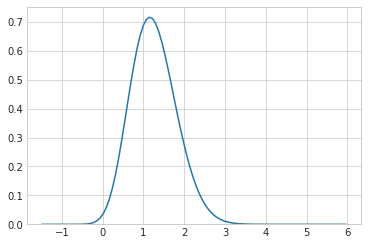

In [14]:
p = sns.kdeplot(rnd_distances, bw=0.5)